In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Conductivity function
def conductivity(x):
    return 1 + 0 * x

In [4]:
# Heat source function (zero in this case)
def heat_source(x):
    return 0 * x

In [5]:
# Mass matrix assembly
def mass_matrix(x):
    n = len(x) - 1
    M = np.zeros((n + 1, n + 1))
    for i in range(n):
        h = x[i + 1] - x[i]
        M[i, i] += h / 3
        M[i + 1, i + 1] += h / 3
        M[i + 1, i] += h / 6
        M[i, i + 1] += h / 6
    return M

In [6]:
# Stiffness matrix assembly
def stiffness_matrix(x, a_func, kappa):
    n = len(x) - 1
    A = np.zeros((n + 1, n + 1))
    for i in range(n):
        h = x[i + 1] - x[i]
        xmid = (x[i + 1] + x[i]) / 2
        a_mid = a_func(xmid)
        A[i, i] += a_mid / h
        A[i + 1, i + 1] += a_mid / h
        A[i + 1, i] -= a_mid / h
        A[i, i + 1] -= a_mid / h

    A[0, 0] += kappa[0]
    A[-1, -1] += kappa[1]
    return A

In [7]:
# Load vector assembly
def load_vector(x, f_func, g, kappa):
    n = len(x) - 1
    b = np.zeros(n + 1)
    for i in range(n):
        h = x[i + 1] - x[i]
        b[i] += f_func(x[i]) * h / 2
        b[i + 1] += f_func(x[i + 1]) * h / 2
    b[0] += kappa[0] * g[0]
    b[-1] += kappa[1] * g[1]
    return b

In [8]:
def heat_solver():
    L = 1              # Length of the rod
    h = 0.1            # Spatial step size
    x = np.arange(0, L + h, h)  # Spatial grid

    m = 100            # Number of time steps
    T = 10             # Final time
    t = np.linspace(0, T, m + 1)  # Time grid

    xi = 1 + x**2      # Initial temperature distribution

    kappa = [1e7, 1e7]  # Large => Dirichlet
    g = [1, 2]          # Boundary values

    # Assembly
    M = mass_matrix(x)
    A = stiffness_matrix(x, conductivity, kappa)
    b = load_vector(x, heat_source, g, kappa)

    # Initial plot
    plt.figure(figsize=(10, 5))
    plt.plot(x, xi, label="Initial Temperature")

    for i in range(m):
        dt = t[i + 1] - t[i]

        if np.isclose(t[i], 0) or np.isclose(t[i], 0.1) or np.isclose(t[i], 0.2) or np.isclose(t[i], 0.5) or np.isclose(t[i], 1):
            plt.plot(x, xi, label=f"u(x,{t[i]:.1f})")

        # Backward Euler update
        xi = np.linalg.solve(M + dt * A, M @ xi + dt * b)

    plt.xlabel("x")
    plt.ylabel("Temperature u(x,t)")
    plt.title("Heat Equation - FEM in Space, Backward Euler in Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

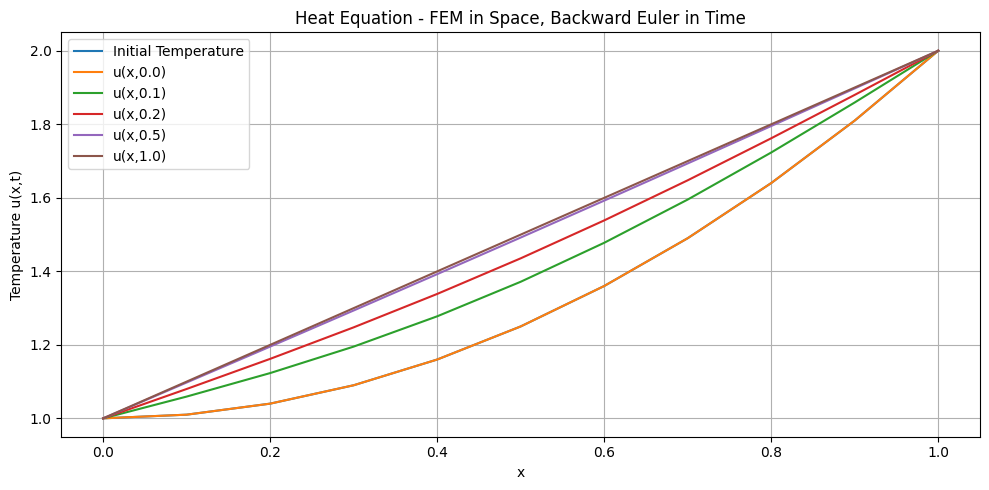

In [9]:
# Run the solver

if __name__ == "__main__":
    heat_solver()